                                     // PROJECT ON GOLDSTOCK //

The GoldStock Project is an in-depth exploration and analysis of the dynamics, trends, and potential investment opportunities 
within the gold stock market. 

 Why GoldStock?
  Gold, often referred to as a "safe-haven" asset, has been a symbol of wealth and stability throughout centuries. Its unique properties make it an 
intriguing investment avenue, especially during times of economic uncertainty. The GoldStock project aims to unravel the mysteries surrounding gold
as an investment, examining its historical performance, volatility, and its role in diversified investment portfolios.
  we can analyse  goldstock by observing  the trading volume,volatility ,closing price ,relative signifacnt index and many more. 

We are going to consider a dataset of goldstock data of some few years.It contains opening,closing,high,low price for a paticular day along with volume.

we will use Python libraries (Pandas,Numpy,Matplotlib) to analyze this data.
The dataset can be downloaded here.
https://www.kaggle.com/datasets/sahilwagh/gold-stock-prices

In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Here I import the necessary python libraries Numpy,Pandas and Matplotlib  for my project 

In [13]:
csv_filepath="goldstock.csv"
df=pd.read_csv(csv_filepath)#reading the csv file
print(df.head())#printing top 5 rows

   No.        Date   Close  Volume    Open    High     Low
0    0  19-01-2024  2029.3  166078  2027.4  2041.9  2022.2
1    1  18-01-2024  2021.6  167013  2009.1  2025.6  2007.7
2    2  17-01-2024  2006.5  245194  2031.7  2036.1  2004.6
3    3  16-01-2024  2030.2  277995  2053.4  2062.8  2027.6
4    4  12-01-2024  2051.6  250946  2033.2  2067.3  2033.1


In [15]:
print("Dataset information")
df.info()#providing a concise summary of the DataFrame including data types and non null values in each columns

Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No.     2511 non-null   int64  
 1   Date    2511 non-null   object 
 2   Close   2511 non-null   float64
 3   Volume  2511 non-null   int64  
 4   Open    2511 non-null   float64
 5   High    2511 non-null   float64
 6   Low     2511 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 137.4+ KB


In [16]:
print("Statistical information")
df.describe()

Statistical information


,No.,Close,Volume,Open,High,Low
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1260.792911,1498.726085,185970.770609,1498.725528,1508.451454,1488.869932
std,729.262879,298.824811,97600.769382,299.118187,301.262244,296.417703
min,0.000000,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,630.500000,1249.850000,126693.500000,1249.500000,1257.300000,1242.350000
50%,1259.000000,1332.800000,175421.000000,1334.000000,1342.400000,1326.600000
75%,1888.500000,1805.850000,234832.000000,1805.600000,1815.450000,1793.050000
max,2532.000000,2093.100000,787217.000000,2094.400000,2098.200000,2074.600000


In [17]:
df.drop(columns=["No."] ,inplace=True)

Since dataframe already provides indices so we can ignore the "No." coloumn.


In [18]:
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')# converting date in a datetime object format


datetime provides a standardized way to represent dates and times. It includes components like year, month, day, hour, minute, second, and microsecond, 
allowing for precise timestamp representation.it enables easy manipulation of dates and times.

In [19]:
df.set_index('Date', inplace=True)#Set the 'Date' column as the index

Here date is set as index

In [20]:
df.head()

,Close,Volume,Open,High,Low
Date,,,,,
2024-01-19,2029.3,166078,2027.4,2041.9,2022.2
2024-01-18,2021.6,167013,2009.1,2025.6,2007.7
2024-01-17,2006.5,245194,2031.7,2036.1,2004.6
2024-01-16,2030.2,277995,2053.4,2062.8,2027.6
2024-01-12,2051.6,250946,2033.2,2067.3,2033.1


Here i am  checking after updating the dataframe df

In [22]:
missing_values = df.isnull().sum()#if any value in datframe df is null then add 1 here and so on
print("Missing Values",missing_values)
df.index.nunique()#no.of unique values of index in df

Missing Values Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64


2493

In [23]:
df.index.unique()#unique values of index in dataframe

DatetimeIndex(['2024-01-19', '2024-01-18', '2024-01-17', '2024-01-16',
               '2024-01-12', '2024-01-11', '2024-01-10', '2024-01-09',
               '2024-01-08', '2024-01-05',
               ...
               '2014-02-04', '2014-02-03', '2014-01-31', '2014-01-30',
               '2014-01-29', '2014-01-28', '2014-01-27', '2014-01-24',
               '2014-01-23', '2014-01-22'],
              dtype='datetime64[ns]', name='Date', length=2493, freq=None)

In [25]:
# Identify duplicate rows based on all columns
duplicate_rows = df[df.index.duplicated()]
print("Duplicate Rows:")# Display the duplicate rows
print(duplicate_rows)

Duplicate Rows:
             Close  Volume    Open    High     Low
Date                                              
2021-11-23  1786.3  146754  1808.7  1815.2  1784.3
2021-11-22  1809.1  136164  1850.7  1853.0  1805.3
2021-11-19  1854.3   61307  1863.8  1870.5  1847.0
2021-11-18  1864.0   48241  1871.7  1875.9  1859.4
2021-11-17  1872.8   30319  1854.5  1873.1  1853.8
2021-11-16  1854.1  212495  1864.9  1879.5  1851.0
2021-11-15  1866.6  208217  1872.6  1873.0  1858.5
2021-11-12  1868.5  192007  1864.3  1871.4  1847.5
2021-11-11  1863.9  178701  1851.5  1868.7  1845.1
2021-11-10  1848.3  323266  1834.5  1870.6  1823.0
2021-11-09  1830.8  202363  1826.9  1834.8  1821.0
2021-11-08  1828.0  180098  1820.6  1828.3  1813.8
2021-11-05  1816.8  276580  1792.6  1820.1  1785.3
2021-11-04  1793.5  213034  1769.9  1800.3  1769.3
2021-11-03  1763.9  248047  1789.2  1789.3  1758.5
2021-11-02  1789.4  141590  1794.8  1797.8  1787.4
2021-11-01  1795.8  140366  1785.3  1797.5  1780.2
2021-10-29  178

In [26]:
df.drop_duplicates(inplace=True)# removing duplicate rows

In [33]:
duplicated_rows=df.index.duplicated()#df.duplicated() returns a boolean Series where True indicates rows that are duplicates of earlier rows.
total_duplicates=duplicated_rows.sum()#sum() is used to count the total number of True values, representing the total number of duplicate rows.
print("No. of duplicates:",total_duplicates)

No. of duplicates: 0


Here i am  checking that if any duplicates reamins or not as i already use drop_duplicates in previous

By using drop_duplicates() dataframe df contains now only unique rows and "inplace=True" implies that it changes in original dataframe

In [34]:
df.sort_values(by=["Volume"],ascending=False)# sorting the value inb decending order based on Volume

,Close,Volume,Open,High,Low
Date,,,,,
2020-01-08,1560.2,787217,1556.7,1563.8,1556.5
2016-11-09,1273.5,783657,1276.8,1338.3,1268.1
2020-02-24,1676.6,655245,1674.2,1674.4,1652.8
2020-02-25,1650.0,654660,1647.0,1655.8,1627.0
2020-03-06,1672.4,619051,1673.1,1692.8,1642.4
...,...,...,...,...,...
2019-09-20,1507.3,2,1503.0,1503.0,1503.0
2018-11-12,1201.3,1,1201.6,1201.6,1201.6
2019-09-13,1490.9,1,1486.9,1486.9,1486.9


here i sort the dataframe in the respect of Volume

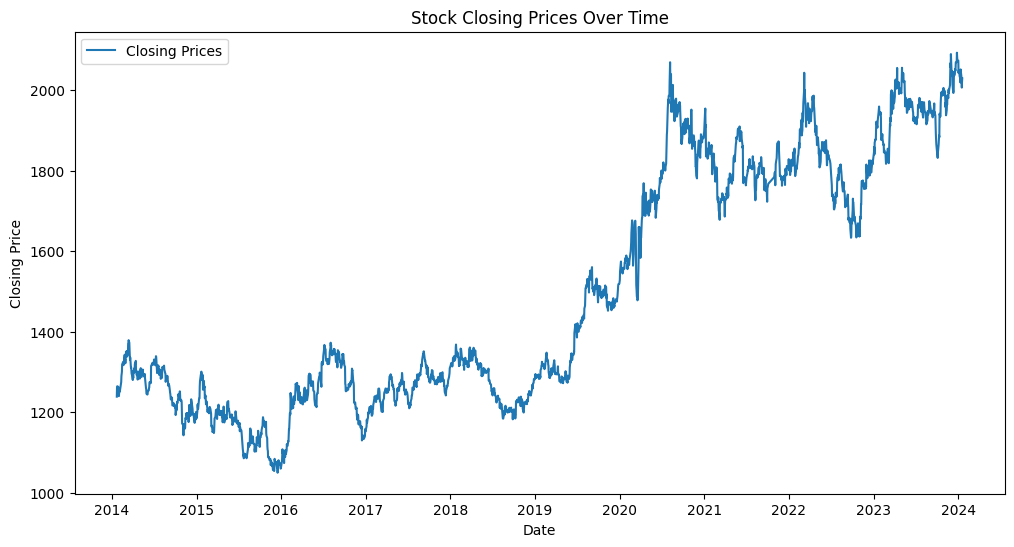

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Prices')# creating the line chart 
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

here we can see by this diagram that in 2016 cosing price was low comparing to others around 1000-1200 and 
in 2021 to 2024 closing price was high .from here we can say that the closing price of this time is
high means investors are more interested to pay more, reflecting confident asset's value. also they may
expect continued growth or positive developments.



In [37]:
average_close = df['Close'].mean()# calculating average of closing price of DataFrame
highest_close = df['Close'].max()# calculating maximum of closing price of DataFrame
lowest_close = df['Close'].min()# calculating minimum of closing price of DataFrame
print(f"Average Closing Price: {average_close}")
print(f"Highest Closing Price: {highest_close}")
print(f"Lowest Closing Price: {lowest_close}")

Average Closing Price: 1496.4998394863564
Highest Closing Price: 2093.1
Lowest Closing Price: 1049.6


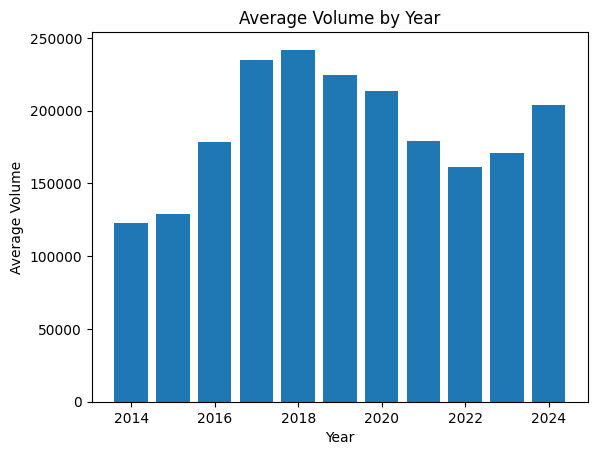

In [39]:
df['Year'] = df.index.year
average_yearly_prices = df.groupby('Year')['Volume'].mean()
# Plot the average closing prices for each year
plt.bar(average_yearly_prices.index, average_yearly_prices)#creating bar chart
plt.title('Average Volume by Year')
plt.xlabel('Year')
plt.ylabel('Average Volume')
plt.show()


from this diagram we can say that in 2014-2018 period volume is increasing that means investors are investing actively .and also
it can understand that gold is considers as an asset. In 2018 it was highest but from 2019-2022 it was decreasing may be for  economic 
stability and low volatility.
average volume provides insight into the typical or average daily trading activity.

Year
2014    29319585
2015    32426701
2016    44821501
2017    58976690
2018    60460634
2019    56581742
2020    53733576
2021    41886990
2022    40074582
2023    42777766
2024     2653902
Name: Volume, dtype: int64


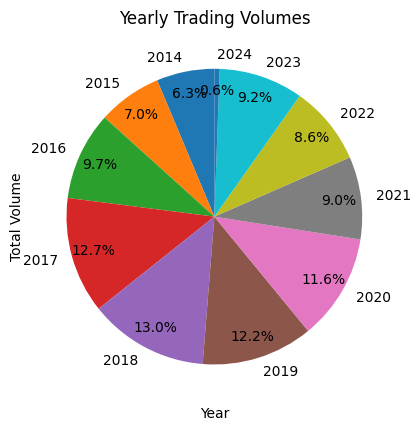

In [40]:
# Assuming 'Date' is a datetime column
df['Year'] = df.index.year #add another column named 'Year'
# Calculate the total trading volume for each year
yearly_volume = df.groupby('Year')['Volume'].sum()
print(yearly_volume)
# Plot a pie chart for the yearly trading volumes
plt.pie(yearly_volume, labels=yearly_volume.index, autopct='%1.1f%%', startangle=90,pctdistance=0.85)  
plt.title('Yearly Trading Volumes')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.show()

   Here the highset trading volume is 12.7% in 2017 and the lowest is 0.6% in 2024.
   The highest trading value signifies heightened market activity, reflecting increased investor interest  during a specific period.
   Trading volume over the year gives the total amount of trading activity that took place during that period.

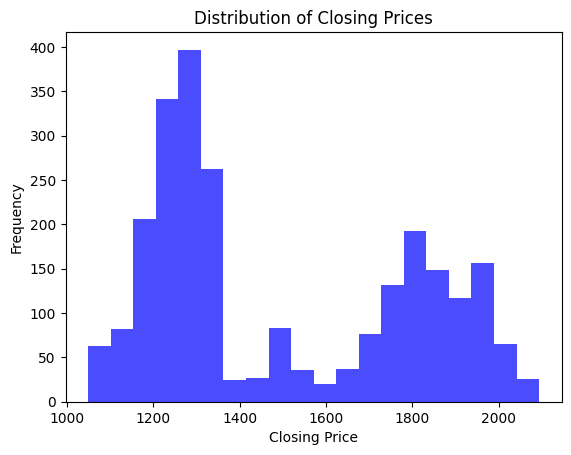

In [41]:
# Explore the distribution of closing prices using histograms
plt.hist(df['Close'], bins=20, color='blue', alpha=0.7)#creating histogram   
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

Most closing price is in 1250-1300 range

Date
2014    17.264017
2015    16.269048
2016    18.872908
2017    12.912351
2018    12.672800
2019    14.266270
2020    29.991667
2021    21.596154
2022    27.108468
2023    24.163600
2024    27.676923
Name: High_Low_Range, dtype: float64


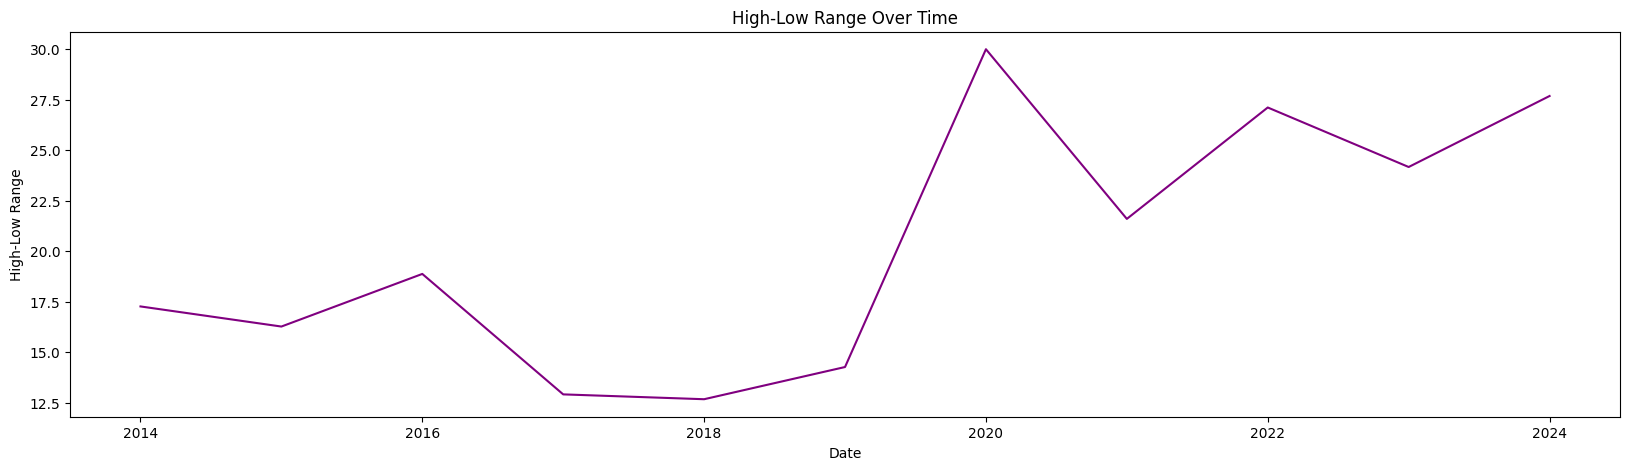

In [42]:
# Calculate the daily high-low range
df['High_Low_Range'] = df['High'] - df['Low']
year=df.index.year
# Visualize the high-low range over time
plt.figure(figsize=(20,5))
average_high_low_range=df.groupby(year)["High_Low_Range"].mean()
print(average_high_low_range)
plt.plot(average_high_low_range, color='purple')
plt.title('High-Low Range Over Time')
plt.xlabel('Date')
plt.ylabel('High-Low Range')
plt.show()

If high-low range is relatively large, it suggests that the price of gold had significant fluctuations during that period, indicating higher
volatility. On the other hand, a smaller high-low range may indicate more stable and less volatile price movements.So from this graph we can see 
in 2020 the high-low range was more than other years so in that time price of gold was more volatile and it seems like  may be there is some
issue on economical condition or change in interest rates and so it is a risk to invest money  in this period .But on the other hand between
2017-2018  the range was suitable so there is a low risk to invest.


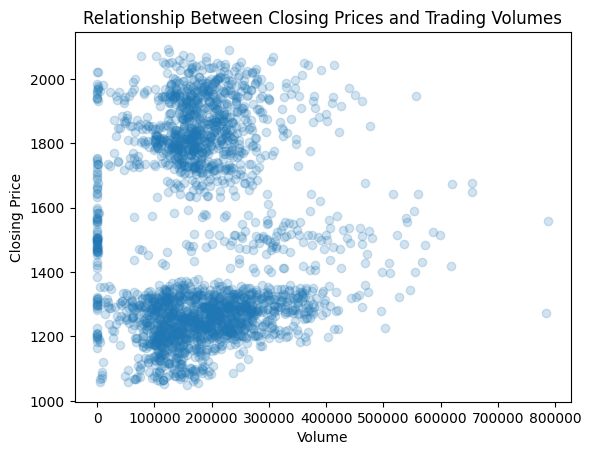

In [53]:
# Explore the relationship between closing prices and trading volumes
plt.scatter(df['Volume'], df['Close'],alpha=0.2)
plt.title('Relationship Between Closing Prices and Trading Volumes')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.show()


from this diagram we can say that most transaction is happened where volume is around 100k-300k and closing price around 1100-1300

In [54]:
# Assuming df is your DataFrame with 'Close' column
window_length = 14
delta = df['Close'].diff()#calculates the difference between consecutive closing prices, representing the price changes.
# Separation of Gains and Losses
gain = delta.where(delta > 0, 0)#gain and loss are calculated based on the positive and negative price changes, respectively.
loss = -delta.where(delta < 0, 0)
# Calculate average gain and average loss with fillna(0)
average_gain = gain.rolling(window=window_length).mean()#average_gain and average_loss are calculated by taking the rolling mean over a specified window length (in this case, 14 days) of gains and losses, respectively.
average_loss = loss.rolling(window=window_length).mean()
# Calculate Relative Strength (RS) and RSI
rs =( average_gain / average_loss).fillna(0)#here Relative Strength is the ratio of average gain to average loss. and fillna(0) is used for handling missing values
rsi = 100 - (100 / (1 + rs))#calculates the Relative Strength Index (RSI) using the previously calculated RS.
# Display results
print("Relative Strength:", rs)
print("Relative Strength Index:", rsi)

Relative Strength: Date
2024-01-19    0.000000
2024-01-18    0.000000
2024-01-17    0.000000
2024-01-16    0.000000
2024-01-12    0.000000
                ...   
2014-01-28    0.296190
2014-01-27    0.444556
2014-01-24    0.558860
2014-01-23    0.581186
2014-01-22    0.468328
Name: Close, Length: 2492, dtype: float64
Relative Strength Index: Date
2024-01-19     0.000000
2024-01-18     0.000000
2024-01-17     0.000000
2024-01-16     0.000000
2024-01-12     0.000000
                ...    
2014-01-28    22.850845
2014-01-27    30.774599
2014-01-24    35.850556
2014-01-23    36.756316
2014-01-22    31.895332
Name: Close, Length: 2492, dtype: float64


  Relative strength is a way to measure how well something is performing compared to its peers or a standards.
  Relative strength index gives a score to a stock or investment based on how well it's performing compared to others in a certain group or market.
  The Relative Strength (RS) and Relative Strength Index (RSI) are calculated based on the historical closing prices of a financial instrument (assumed to be stored in the 'Close' column of the DataFrame 'df'). 
  RSI is a normalized indicator that ranges between 0 and 100.
  RSI values above 70: Considered overbought, suggesting that the asset may be due for a potential pullback.
  RSI values below 30: Considered oversold, indicating that the asset may be due for a potential rebound.


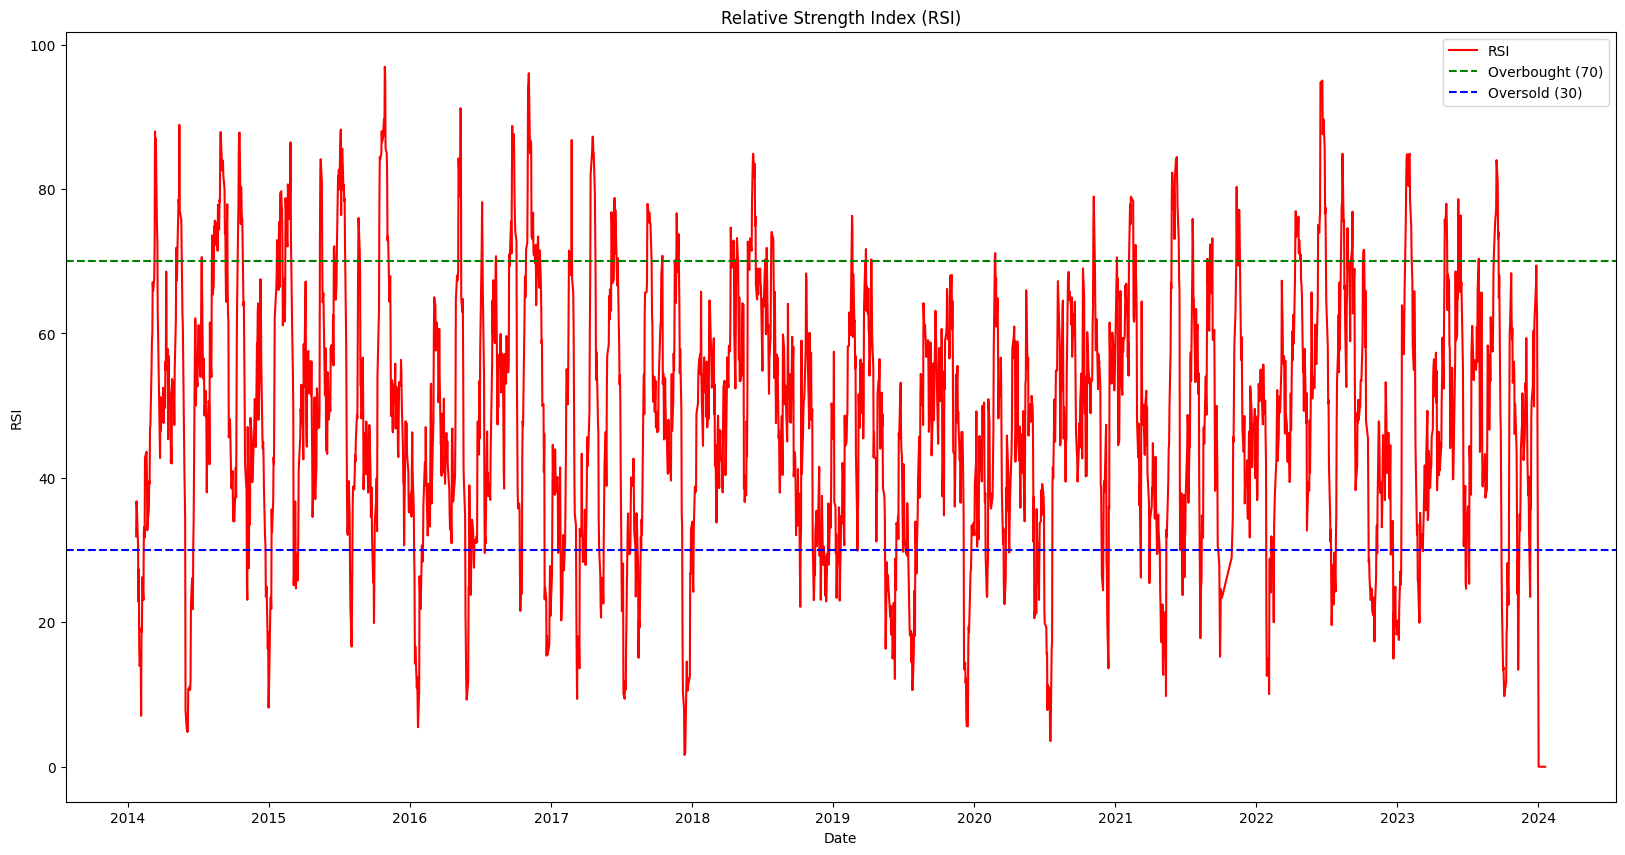

In [55]:
plt.figure(figsize=(20,10))
plt.plot(df.index, rsi, label='RSI', color='red')#creating line chart
plt.axhline(70, linestyle='--', color='green', label='Overbought (70)')#axhline from Matplotlib are horizontal lines indicating specific levels on the y-axis.
plt.axhline(30, linestyle='--', color='blue', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

 In this diagram we can see that just before 2016 , 2017 and almost in the middle of 2022 and 2023 the values represented by this line is 
significantly above 70.(overbought)
 Otherside in 2018 the value represented by this line is significantly below 30 (oversold )
 RSI trends suggest a balanced sentiment without prolonged extremes, providing valuable insights into investor sentiment and potential 
movements in stock prices.


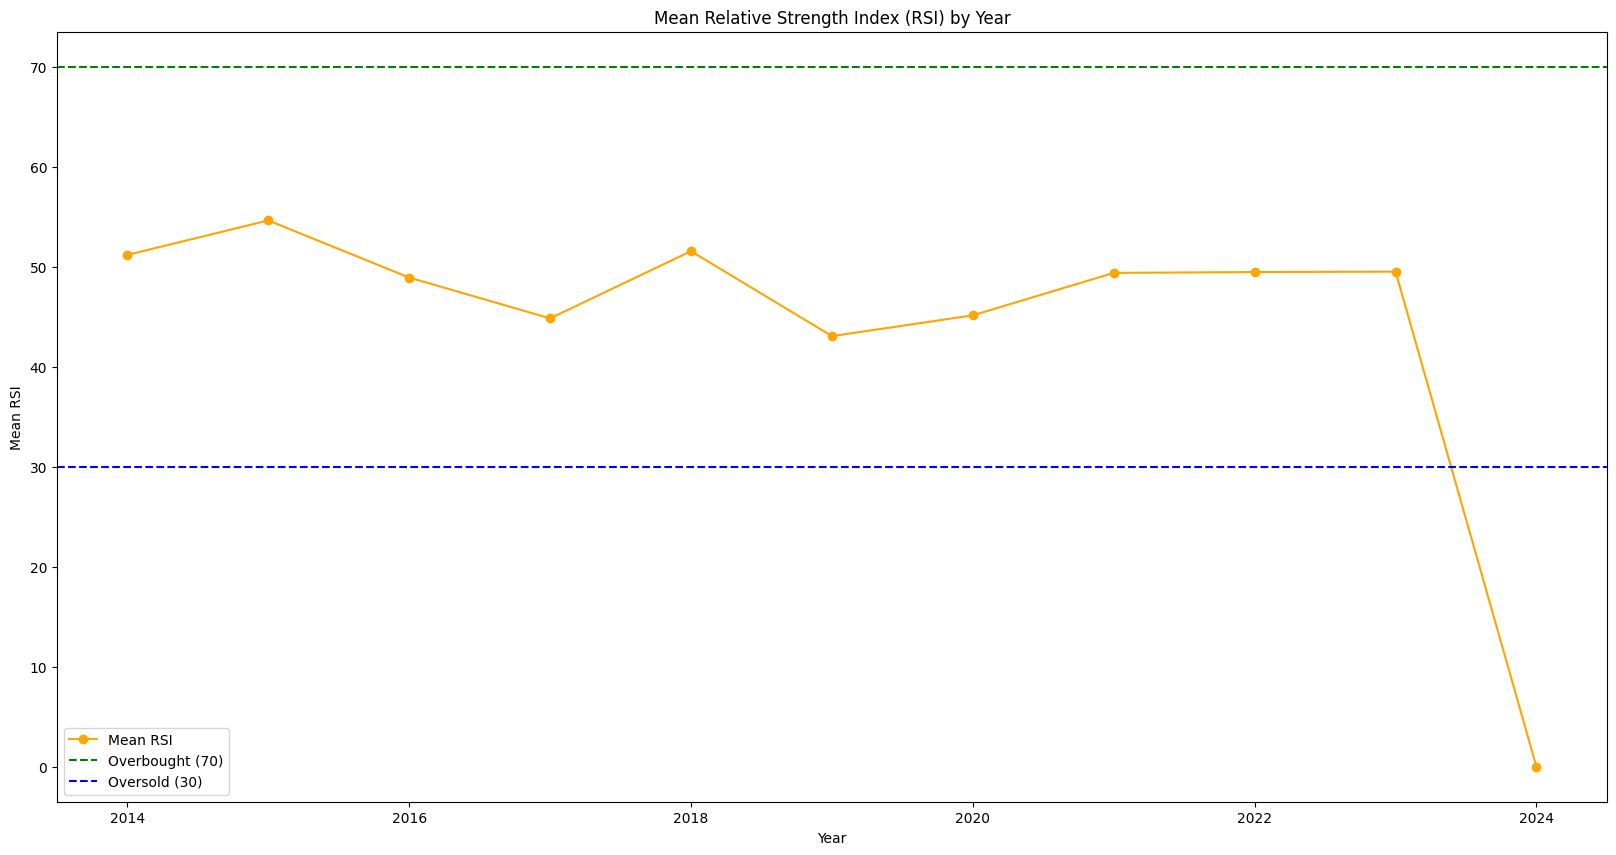

In [56]:
df['Year'] = df.index.year
# Group by year and calculate mean RSI for each group
rsi_mean_by_year = rsi.groupby(df['Year']).mean()
# Plot the mean RSI for every year
plt.figure(figsize=(20, 10))
plt.plot(rsi_mean_by_year.index, rsi_mean_by_year, label='Mean RSI', color='orange', marker='o') 
plt.axhline(70, linestyle='--', color='green', label='Overbought (70)')
plt.axhline(30, linestyle='--', color='blue', label='Oversold (30)')
plt.title('Mean Relative Strength Index (RSI) by Year')
plt.xlabel('Year')
plt.ylabel('Mean RSI')
plt.legend()
plt.show()

The line representing the mean Relative Strength Index (RSI) is between the levels of oversold (30) and overbought (70) before 2023.So it suggests a moderate
RSI value on average. It may suggest a balanced or neutral sentiment regarding the stock, with moderate fluctuations over a period. But in 2024 it just
decreases and takes 0 value.

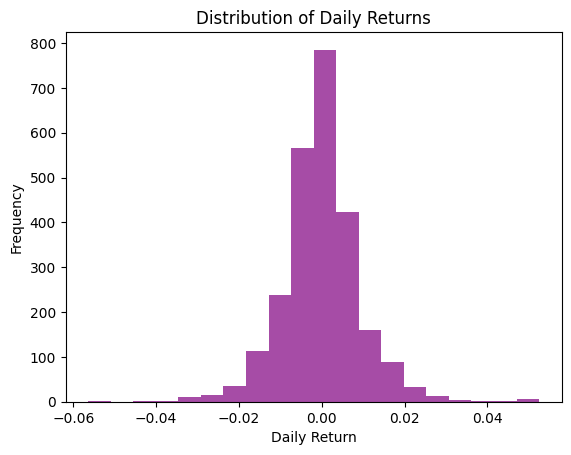

Correlation Matrix:
           Close    Volume      Open      High       Low
Close   1.000000  0.023341  0.998996  0.999525  0.999575
Volume  0.023341  1.000000  0.027594  0.031406  0.018820
Open    0.998996  0.027594  1.000000  0.999458  0.999385
High    0.999525  0.031406  0.999458  1.000000  0.999249
Low     0.999575  0.018820  0.999385  0.999249  1.000000


In [57]:
# Calculate daily returns and add the 'Daily_Return' column to the DataFrame
df['Daily_Return'] = df['Close'].pct_change() # df['Close'].pct_change() will give the percentage change in closing prices from one day to the next
# Analyze the distribution of daily returns using histograms
plt.hist(df['Daily_Return'].dropna(), bins=20, color='purple', alpha=0.7)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()
# Calculate the correlation matrix between 'Close', 'Volume', 'Open', 'High', and 'Low'
correlation_matrix = df[['Close', 'Volume', 'Open', 'High', 'Low']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

   From this diagram we can see that most frequency is around 0 which implies  flactution is not so much ocuured in this stock   

From this correlation matrix we can say that the most strongest relation between two different variables is close vs open and
low vs volume is most weakest relation.


In [58]:
# Calculate volatility 
volatility = np.std(df['Daily_Return'])
print(volatility) 
volatility_percentage=volatility*100
print(f"Volatility Percentage:{volatility_percentage:.2f}%")

0.009323600340874531
Volatility Percentage:0.93%


If we consider the daily returns of the gold stock, the calculated volatility is approximately 0.93%, indicating a moderate level of daily price 
fluctuations. So here the fluictuation is moderate.

Conclusion:
1)Open price and Close price are almost same in this goldstock
2)From 2021 the closing price is increasing which is saying that investors are more interested to invest in goldstock
3)From relative strength index we can say that this golstock is moderate that means it has not so much risk
4)Overall this stock has not so much flactuation.
5)Most transaction was happened in 2018.
6)In 2018 high low range was also very less which is proving that there is not much fluctutaion here.
7)Most closing pricees are around 1250-1300 
